In [1]:
# -*- coding: utf-8 -*-
# practical 4
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import logging
logging.getLogger("imported_module").setLevel(logging.WARNING)

import numpy as np
import pandas as pd
import re, sys, math
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag as pt
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer as WNL
from collections import ChainMap
sys.setrecursionlimit(0x100000)

In [2]:
# tokenize word
def word_tokenized(to_token):
    if to_token is None:
        print("Error!.. No handle specified for tokenizing")
    generated_t = word_tokenize(to_token)
    return generated_t

In [3]:
documentA = "Brexit is for British exit referring to the UK decision in a referendum to leave the European Union"
documentB = "Brexit is Britian's exit referring to the UK decision to leave the European Union"
documentC = "Brexit is combination of words Britain and exit which signifies split from the European Union"
documentD = "Brexit is abbreviation for withdrawal of United Kingdom from European Union"
documentE = "Brexit is for British exit referriing to United Kingdom decision to leave the European Union"
documentF = "Brexit is an abbreviation for British exit referring to the UK decision to leave the European Union"

In [4]:
def pre_process(text):
    def mapper(nltk_tag):
        if nltk_tag.startswith('J'): return 'a'
        elif nltk_tag.startswith('V'): return 'v'
        elif nltk_tag.startswith('N'): return 'n'    
        elif nltk_tag.startswith('R'): return 'r'
        else: return 'n'
        
    def lemmatize_words(tokenised):
        if tokenised == None:
            return None
        lemmatizer = WNL() #initialise WordNetLemmatizer
        pos_tagged = pos_tag(tokenised) #nltk pos tagged
        wordnet_tagged = map(lambda ele: (ele[0], mapper(ele[1])), pos_tagged)
        result_lemmatized = []
        for k, v in wordnet_tagged:
            if v is not None:
                result_lemmatized.append(lemmatizer.lemmatize(k, v))
        return result_lemmatized

    def remove_stop_words(pre_processed_text):
        if pre_processed_text == None or pre_processed_text == []:
            print("Error..Exiting")
        else:
            stopwds = set(stopwords.words('english'))
            tokenised = word_tokenize(pre_processed_text)
            text = [i for i in tokenised if not i in stopwds]
            text = lemmatize_words(text)
        return text
    
    #resultant_text = []
    resultant_text = ""
    resultant_text = text.lower() # lowercase
    resultant_text=re.sub("<!--?.*?-->","",resultant_text) # tags
    resultant_text=re.sub("(\\d|\\W)+"," ",resultant_text) # special characters and digits
    resultant_text = remove_stop_words(resultant_text)
    return resultant_text

corpusA = pre_process(documentA)
corpusB = pre_process(documentB)
corpusC = pre_process(documentC)
corpusD = pre_process(documentD)
corpusE = pre_process(documentE)
corpusF = pre_process(documentF)

In [62]:
def JaccardDistance(str1, str2):
    set1 = set(str1.split())
    set2 = set(str2.split())
    ans = float(len(set1 & set2)) / len(set1 | set2)
    return round(1 - ans, 2)
#print(JaccardDistance(' '.join(corpusA), ' '.join(corpusB)))

jaccard_distance = {}
corpuses = [corpusA, corpusB, corpusC, corpusD, corpusE, corpusF]
labels = ['A', 'B', 'C', 'D', 'E', 'F']

for i in range(6):
    for j in range(i+1, 6):
        curr_dist_label = labels[i] + labels[j]
        if curr_dist_label not in jaccard_distance:
            jaccard_distance[curr_dist_label] = JaccardDistance(' '.join(corpuses[i]), ' '.join(corpuses[j]))

jaccard_dist_df = pd.DataFrame.from_dict(list(jaccard_distance.items()))
jaccard_dist_dfT = dice_coeff_df.T

jaccard_dist_dfT
z = jaccard_dist_dfT[1][1]
x = jaccard_dist_dfT[5][1]
y = jaccard_dist_dfT[0][1]

print("### Proving Jaccard Similarity ###")
print("z(AC):" + str(z))
print("x(BC):" + str(x))
print("y(AB):" + str(y))
print("z < x + y: " + str(z < x + y))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,AB,AC,AD,AE,AF,BC,BD,BE,BF,CD,CE,CF,DE,DF,EF
1,0.16,0.58,0.65,0.3,0.1,0.56,0.62,0.37,0.16,0.62,0.58,0.58,0.41,0.53,0.3


### Proving Jaccard Similarity ###
z(AC):0.58
x(BC):0.56
y(AB):0.16
z < x + y: True


In [64]:
def DiceCoefficient(str1, str2):
    set1 = set(str1.split())
    set2 = set(str2.split())
    ans = float((2 * len(set1 & set2)) / (len(set1) + len(set2)))
    return round(1 - ans, 2)

dice_coefficients = {}
labels = ['A', 'B', 'C', 'D', 'E', 'F']
corpuses = [corpusA, corpusB, corpusC, corpusD, corpusE, corpusF]

for i in range(6):
    for j in range(i+1, 6):
        curr_dist_label = labels[i] + labels[j]
        if curr_dist_label not in dice_coefficients:
            dice_coefficients[curr_dist_label] = DiceCoefficient(' '.join(corpuses[i]), ' '.join(corpuses[j]))

dice_distance_df = pd.DataFrame.from_dict(list(dice_coefficients.items()))
dice_distance_dfT = dice_distance_df.T
dice_distance_dfT

z = dff[1][1]
x = dff[5][1]
y = dff[0][1]

print("### Proving Dice Coefficient Distance ###")
print("z(AC) : " + str(z))
print("x(BC) : " + str(x))
print("y(AB) : " + str(y))
print("z > x + y : " + str(z > x + y))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,AB,AC,AD,AE,AF,BC,BD,BE,BF,CD,CE,CF,DE,DF,EF
1,0.16,0.58,0.65,0.3,0.1,0.56,0.62,0.37,0.16,0.62,0.58,0.58,0.41,0.53,0.3


### Proving Dice Coefficient Distance ###
z(AC) : 0.58
x(BC) : 0.56
y(AB) : 0.16
z > x + y : False


Loading docs...
dict_values([0.005, 1.0, 0.011, 0.224, 0.464, 0.44, 0.348, 0.613])


Text(0.5, 1.0, 'Scatter Plot using cosine.py')

Text(0.5, 0, 'Documents')

Text(0, 0.5, 'Cosine Similarity')

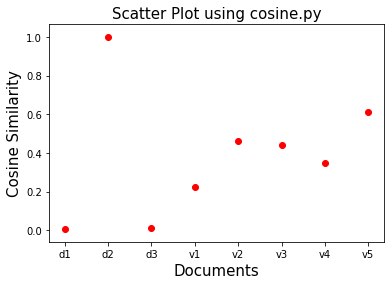

In [82]:
__author__ = 'user'
# bits from http://stackoverflow.com/questions/15173225/how-to-calculate-cosine-similarity-given-2-sentence-strings-python
# load_docs, process_docs and compute_vector by MK
import math
from collections import Counter

vector_dict = {}                                       #Dict that will hold tf-idf matrix
#Just loads in all the documents
def load_docs():
    print("Loading docs...")
    doc1=('d1', 'Tom and Jerry Potato appears as cartoon as well as there are commercial products like mashed potato chips.')
    doc2=('d2', 'Tommy Jerry Faces appear crispy, mashed, rounded chips and they are tasty')
    doc3=('d3', 'Tom Jerry and their chips are very famously available to the public')
    variant1 = ('v1', 'Tommy Jerry Faces appear crisp, mash, round chips and they are very tasty')
    variant2 = ('v2', 'Tommy Jerry Faces appearing crispy, mashed, rounded chips and they very very tasty')
    variant3 = ('v3', 'Tom and Jerry Faces appear crisp, mashed, rounded chips and they are very tasty')
    variant4 = ('v4', 'Tommy Jerry Faces appear, mashed, rounded chips and they are tasty')
    variant5 = ('v5' ,'Tommy Jerry Faces appear crispy, mashed, round chips tasty')
    return [doc1,doc2,doc3,variant1, variant2, variant3, variant4, variant5]

#Computes TF for words in each doc, DF for all features in all docs; finally whole Tf-IDF matrix
def process_docs(all_dcs):
    stop_words = [ 'of', 'and', 'on','in' ]
    all_words = []                                         #list to collect all unique words in each docs
    counts_dict = {}                                       #dict to collect doc data, word-counts and word-lists
    for doc in all_dcs:
        words = [x.lower() for x in doc[1].split() if x not in stop_words]
        words_counted = Counter(words)                      #counts words in a doc
        unique_words = list(words_counted.keys())           #list of the unique words in the doc
        counts_dict[doc[0]] = words_counted                 #make dict entry {'d1' : {'a': 1, 'b':6}}
        all_words = all_words + unique_words                #collect all unique words from each doc; bit hacky
        n = len(counts_dict)                                   #number of documents is no of entries in dict
        df_counts = Counter(all_words)                         #DF of all unique words from each doc, counted
        compute_vector_len(counts_dict, n, df_counts)          #computes TF-IDF for all words in all docs

#computes TF-IDF for all words in all docs
def compute_vector_len(doc_dict, no, df_counts):
    global vector_dict
    for doc_name in doc_dict:                              #for each doc
        doc_words = doc_dict[doc_name].keys()                #get all the unique words in the doc
        wd_tfidf_scores = {}
        for wd in list(set(doc_words)):                      #for each word in the doc
            wds_cts = doc_dict[doc_name]                     #get the word-counts-dict for the doc
            wd_tf_idf = wds_cts[wd] * math.log(no / df_counts[wd], 10)   #compute TF-IDF
            wd_tfidf_scores[wd] = round(wd_tf_idf, 4)        #store Tf-IDf scores with word
            vector_dict[doc_name] = wd_tfidf_scores              #store all Tf-IDf scores for words with doc_name

def get_cosine(text1, text2):
    vec1 = vector_dict[text1]
    vec2 = vector_dict[text2]
    intersection = set(vec1.keys()) & set(vec2.keys())
    #NB strictly, this is not really correct, needs vector of all features with zeros
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return round(float(numerator) / denominator, 3)

#RUN THE DEFINED FNS
all_docs = load_docs()
process_docs(all_docs)
#vector_dict['q'] = {'semantic' : 1, 'latent' : 1, 'indexing' : 1}

#for keys,values in vector_dict.items(): print(keys, values)
#print(vector_dict)
d_arr = ['d1', 'd2', 'd3', 'v1', 'v2', 'v3', 'v4', 'v5']
all_cosine = []
cosines_d2 = {} #all cosines between d2 and remaining...
cosines_all = {}
labels = ['d1', 'd2', 'd3', 'v1', 'v2', 'v3', 'v4', 'v5']

for i in range(8):
    for j in range(i+1, 8):
        curr_dist_label = labels[i] + labels[j]
        text1, text2 = d_arr[i], d_arr[j]
        cosine = get_cosine(text1, text2)
        all_cosine.append(cosine)
        cosines_all[curr_dist_label] = cosine 
        #print('Distance of :' + str(d_arr[i]) + '=>' + str(d_arr[j]))
        #print('Cosine:', cosine)

#
for i in range(0, len(d_arr)):
    text1, text2 = d_arr[1], d_arr[i]
    cosine = get_cosine(text1, text2)
    cosines_d2[d_arr[i]] = cosine
    all_cosine.append(cosine)
    #print('Distance of :' + str(d_arr[1]) + '=>' + str(d_arr[i]))
    #print('Cosine:', cosine)
print(cosines_d2.values())

cosine_distances_df = pd.DataFrame.from_dict(list(cosines_all.items()))
display(cosine_distances_df)

y = list(cosines_d2.values())
plt.scatter(['d1', 'd2', 'd3', 'v1', 'v2', 'v3', 'v4', 'v5'],y,color='r')
plt.title('Scatter Plot using cosine.py', fontsize=15)
plt.xlabel('Documents', fontsize=15)
plt.ylabel('Cosine Similarity', fontsize=15)


### import matplotlib.pyplot as plt
lt = cosines_d2.items()
x, y = zip(*lt)
plt.scatter(x,y,color='r')
plt.title('Scatter Plot', fontsize=15)
plt.xlabel('Documents', fontsize=15)
plt.ylabel('Cosine Similarity', fontsize=15)
plt.show()

['products commercial as jerry mashed well tom are cartoon there potato chips like appears ',
 'mashed faces chips rounded tasty crispy are appear tommy they jerry ',
 'chips very public tom their are the to available jerry famously ',
 'chips faces very round crisp mash tasty are appear tommy they jerry ',
 'mashed faces chips appearing very rounded tasty crispy tommy they jerry ',
 'mashed faces chips very crisp rounded tasty tom are appear they jerry ',
 'mashed faces chips rounded tasty appear are tommy they jerry ',
 'mashed faces chips round tasty crispy appear tommy jerry ']

,appear,appearing,appears,are,as,available,cartoon,chips,commercial,crisp,...,tasty,the,their,there,they,to,tom,tommy,very,well
d1,0.000000,0.000000,0.310964,0.155392,0.310964,0.000000,0.310964,0.124183,0.310964,0.000000,...,0.000000,0.000000,0.000000,0.310964,0.000000,0.000000,0.224887,0.000000,0.000000,0.310964
d2,0.314353,0.000000,0.000000,0.279875,0.000000,0.000000,0.000000,0.223664,0.000000,0.000000,...,0.279875,0.000000,0.000000,0.000000,0.314353,0.000000,0.000000,0.314353,0.000000,0.000000
d3,0.000000,0.000000,0.000000,0.182545,0.000000,0.365301,0.000000,0.145882,0.000000,0.000000,...,0.000000,0.365301,0.365301,0.000000,0.000000,0.365301,0.264183,0.000000,0.231630,0.000000
v1,0.255652,0.000000,0.000000,0.227613,0.000000,0.000000,0.000000,0.181899,0.000000,0.381735,...,0.227613,0.000000,0.000000,0.000000,0.255652,0.000000,0.000000,0.255652,0.288817,0.000000
v2,0.000000,0.498428,0.000000,0.000000,0.000000,0.000000,0.000000,0.199047,0.000000,0.000000,...,0.249070,0.000000,0.000000,0.000000,0.279753,0.000000,0.000000,0.279753,0.316044,0.000000
v3,0.281433,0.000000,0.000000,0.250566,0.000000,0.000000,0.000000,0.200242,0.000000,0.420230,...,0.250566,0.000000,0.000000,0.000000,0.281433,0.000000,0.362624,0.000000,0.317942,0.000000
v4,0.343818,0.000000,0.000000,0.306109,0.000000,0.000000,0.000000,0.244630,0.000000,0.000000,...,0.306109,0.000000,0.000000,0.000000,0.343818,0.000000,0.000000,0.343818,0.000000,0.000000
v5,0.328261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233560,0.000000,0.000000,...,0.292257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328261,0.000000,0.000000


Text(0.5, 1.0, 'Scatter Plot using sklearn cosine_similarity')

Text(0.5, 0, 'Documents')

Text(0, 0.5, 'Cosine Similarity')

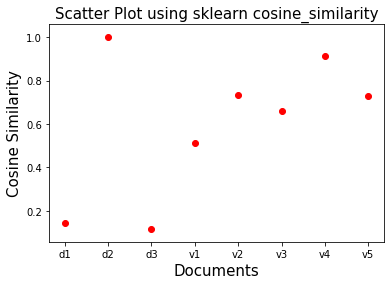

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []
#print(vector_dict)
for rkey, rvalues in vector_dict.items():
    cstr = ''
    for rkkv, rkvv in rvalues.items():
        cstr += rkkv.strip('.').strip(',')
        cstr += ' '
    documents.append(cstr)
documents
count_vectorizer = TfidfVectorizer(stop_words='english')
count_vectorizer = TfidfVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)
doc_term_matrix = sparse_matrix.todense()
#print(doc_term_matrix)
df = pd.DataFrame(doc_term_matrix,
                  columns=count_vectorizer.get_feature_names(),
                  index=['d1', 'd2', 'd3', 'v1', 'v2', 'v3', 'v4', 'v5'])
display(df)
c = cosine_similarity(sparse_matrix)
#print(c)
#plt.plot(c[2])
y = c[1]
plt.scatter(['d1', 'd2', 'd3', 'v1', 'v2', 'v3', 'v4', 'v5'],y,color='r')
plt.title('Scatter Plot using sklearn cosine_similarity', fontsize=15)
plt.xlabel('Documents', fontsize=15)
plt.ylabel('Cosine Similarity', fontsize=15)
plt.show()

In [10]:
from sklearn.metrics.pairwise import euclidean_distances
euc = euclidean_distances(sparse_matrix)

Text(0.5, 1.0, 'Scatter Plot')

Text(0.5, 0, 'Documents')

Text(0, 0.5, 'Euclidean distance')

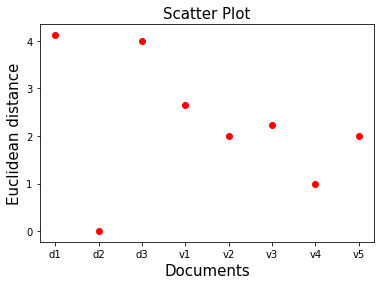

In [84]:
y = euc[1]
plt.scatter(['d1', 'd2', 'd3', 'v1', 'v2', 'v3', 'v4', 'v5'],y,color='r')
plt.title('Scatter Plot', fontsize=15)
plt.xlabel('Documents', fontsize=15)
plt.ylabel('Euclidean distance', fontsize=15)
plt.show()

In [88]:
#Q3.)

spam_set = 
[
'Lets rake in dough? RT Retweet for a chance to #WinDominosPizza No shhame in this pizza game there are rules here - http://bit.ly/2kY0Y4r','Ready to rake in the dough? Retweet for a chance to #WinDominosPizza No shame in this pizza game #Pizza  Rules here - http://bit.ly/2kY0Y4r',
'Lets rake in dough? Retweet for a chance to #WinDominosPizza No shhame in this pizza game rules here - http://bit.ly/2kY0Y4r',
'Rake in this dough thing? Go retweet for a chance to #WinDominosPizza No shame here the rules here - http://bit.ly/2kY0Y4r',
'Go rake in this dough? Retweet for a chance to #WinDominosPizza NO shame in this pizza game the rules http://bit.ly/2kY0Y4r',
'Lets get doughy? Retweet for a chance to #WinDOminosPizzas Yaaayyyyy!!! Share this. Rules http://bit.ly/2kY0Y4rE',
'Are you ready to rake in the dough? Retweet for a chance to #WinDominosPizza No shame in this pizza game #Pizza  Rules here - http://bit.ly/2kY0Y4r',
'Omg! Lets, retweet for a chance to #WinDominosPizza No shaming for this pizza game #Pizza  Rules here - http://bit.ly/2kY0Y4r',
'Ready to rake in our dough? #NationalPizzaMonth Lets play this game. Rules here - http://bit.ly/2kY0Y4r',
'Yaaay!!! Lets rake in dough? #NationalPizzaMonth Lets play this yummy pizzy game. Rules here - http://bit.ly/2kY0Y4rEE',
'Go ahead >>>  Lets start and rake in dough? Retweet for a chance to #WinDominosPizza No shhame in this pizza game rules here - http://bit.ly/2kY0Y4r',
'Begin...Omg.. Lets rake in dough? Retweet for a chance to #WinDominosPizza No shame in this pizza game rules here - http://bit.ly/2kY0Y4r',
'And lets go!! Lets rake in dough? Retweet for a chance to #WinDominosPizza No shame in this pizza game rules here - http://bit.ly/2kY0Y4r',
'Lets rake in dough? Retweet for a chance to #WinDominosPizza No shame in this pizza game rules - http://bit.ly/2kY0Y4r',
'Yumm!! Lets rake in dough? Retweet for a chance to #WinDominosPizza shame in this pizza game rules here you go - http://bit.ly/2kY0Y4r',
'Nom! Are you ready to rake in dough? Retweet for  chance  #WinDominosPizza shame in this pizza game rules here - http://bit.ly/2kY0Y4r',
'Lets begin? Why not in dough? Retweet for a chance to #WinDominosPizza shame in this pizza game rules here - http://bit.ly/2kY0Y4r',
'Why not lets rake in dough? Retweet for  chance  #WinDominosPizza No shame in this pizza game rules http://bit.ly/2kY0Y4r',
'Can we lets rake in dough? Retweet for a chance to #WinDominosPizza There is no shame in this pizza game Yaaay!!!! Rules http://bit.ly/2kY0Y4r',
'Why not lets rake in dough? Retweet for the chance to #WinDominosPizza shame in this pizza game Woah!! rules here - http://bit.ly/2kY0Y4r'
]

normal_set = ['Lets rake in dough? Retweet for a chance to #WinDominosPizza No shame in this pizza game. Rules here - http://bit.ly/2kY0Y4r',
'Enjoys long walks to the fridge for leftover pizza. #DominosPizza #WinDominosPizza',
'We are giving away FREE PIZZA to celebrate #WinDominosPizza',
'Gear up for game day with pizza on us. Retweet for a chance to #WinDominosPizza in honor of #NationalPizzaMonth.',
'I am officially committed to #pizza nobody else can have any. #NationalPizzaMonth']

In [13]:
from nltk.tokenize import TweetTokenizer
import nltk.metrics
import distance
tknzr = TweetTokenizer()

cleaned_spam_set,cleaned_normal_set = [], []
for ele in spam_set:
    cleaned_spam_set.append(' '.join(tknzr.tokenize(ele.replace(".", "").replace("!", "").replace("?","").replace(":","").replace("http", "").replace("/", ""))))

for j in normal_set:
    cleaned_normal_set.append(' '.join(tknzr.tokenize(j.replace(".", "").replace("!", "").replace("?","").replace(":","").replace("http", "").replace("/", ""))))

`
print(cleaned_spam_set)

['Lets rake in dough RT Retweet for a chance to #WinDominosPizza No shhame in this pizza game there are rules here - bitly 2kY0Y4r', 'Ready to rake in the dough Retweet for a chance to #WinDominosPizza No shame in this pizza game #Pizza Rules here - bitly 2kY0Y4r', 'Lets rake in dough Retweet for a chance to #WinDominosPizza No shhame in this pizza game rules here - bitly 2kY0Y4r', 'Rake in this dough thing Go retweet for a chance to #WinDominosPizza No shame here the rules here - bitly 2kY0Y4r', 'Go rake in this dough Retweet for a chance to #WinDominosPizza NO shame in this pizza game the rules bitly 2kY0Y4r', 'Lets get doughy Retweet for a chance to #WinDOminosPizzas Yaaayyyyy Share this Rules bitly 2kY0Y4rE', 'Are you ready to rake in the dough Retweet for a chance to #WinDominosPizza No shame in this pizza game #Pizza Rules here - bitly 2kY0Y4r', 'Omg Lets , retweet for a chance to #WinDominosPizza No shaming for this pizza game #Pizza Rules here - bitly 2kY0Y4r', 'Ready to rake i

In [14]:
distances = dict()
ndistances = [[0 for i in range(len(cleaned_normal_set))] for j in range(len(cleaned_spam_set))] 
print(ndistances)
spam_labels = ['spam-' + str(i+1) for i in range(20)]
non_spam_labels = ['clean-' + str(i+1) for i in range(5)]
print(spam_labels)
print(non_spam_labels)

for i in range(len(cleaned_spam_set)):
    for j in range(len(cleaned_normal_set)):
        #print(i, j)
        cdist = distance.levenshtein(' '.join(cleaned_spam_set[i]), ' '.join(cleaned_normal_set[j]))
        ndistances[i][j] = cdist
        #distances[clabel] = distance.levenshtein(' '.join(cleaned_spam_set[i]), ' '.join(cleaned_normal_set[j]))
#print(ndistances)

resultant_df = pd.DataFrame(ndistances, columns = non_spam_labels, index = spam_labels)
#resultantdfT = resultant_df.T
resultant_df

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
['spam-1', 'spam-2', 'spam-3', 'spam-4', 'spam-5', 'spam-6', 'spam-7', 'spam-8', 'spam-9', 'spam-10', 'spam-11', 'spam-12', 'spam-13', 'spam-14', 'spam-15', 'spam-16', 'spam-17', 'spam-18', 'spam-19', 'spam-20']
['clean-1', 'clean-2', 'clean-3', 'clean-4', 'clean-5']


,clean-1,clean-2,clean-3,clean-4,clean-5
spam-1,29,145,170,117,147
spam-2,32,143,170,114,146
spam-3,3,122,147,99,124
spam-4,55,116,139,90,122
spam-5,28,117,142,100,122
spam-6,58,96,121,100,95
spam-7,48,154,184,112,161
spam-8,47,125,150,104,126
spam-9,79,89,108,101,84
spam-10,78,106,129,94,106


Text(0.5, 0, 'Spam Tweets')

Text(0, 0.5, 'editDistance --> (non-spam, spam)')

Text(0.5, 1.0, 'Relationship Between Spam and Non-Spam Tweets')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

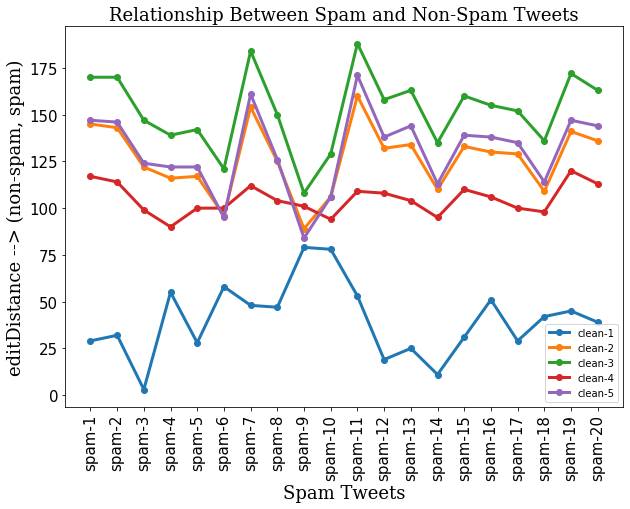

In [29]:
#import seaborn
#from matplotlib import pyplot
fig, ax1 = plt.subplots()

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
fig.set_size_inches(10, 7)
ax1.set_xlabel('Spam Tweets', fontdict = font)
ax1.set_ylabel('editDistance --> (non-spam, spam)', fontdict = font)
ax1.set_title('Relationship Between Spam and Non-Spam Tweets', fontdict = font)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='both', which='minor', labelsize=12)
plt.xticks(rotation = 90)

plt.plot(resultant_df, linewidth = 3, marker = 'o', markersize = 6)
plt.legend(non_spam_labels, loc = 'lower right')
plt.show()